# set environment

In [1]:
import warnings
warnings.filterwarnings('ignore')
#### see http://blog.konghy.cn/2017/12/16/python-warnings/

import pandas as pd
import seaborn as sns
import numpy as np

# to normalize the strings
import unicodedata
import matplotlib.pyplot as plt
%matplotlib inline
#### see https://blog.csdn.net/liangzuojiayi/article/details/78183783
#### run %matplotlib inline and we don't need plt.show() anymore

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows',1000)

#color setting
pals = sns.hls_palette(8, l=.3, s=.8)
#### see https://zh.wikipedia.org/wiki/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4
purple = sns.cubehelix_palette(11)
#### This produces a colormap with linearly-decreasing (or increasing) brightness.
light_purple = sns.light_palette('purple', n_colors=8)
#### Make a sequential palette that blends from light to ``color``.
pink = sns.color_palette('husl',8)[7]
#### Return a list of colors defining a color palette.
sns.set_palette(pals)
#### see https://zhuanlan.zhihu.com/p/37135678

#figure size
fig_size=(12,9)
sns.set(font_scale=1.4)
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['figure.figsize']=fig_size
#### rc stands for Script file containing startup instructions for an application program (or an entire operating system)
#### see http://www.catb.org/jargon/html/R/rc-file.html


# import data

In [2]:
#merge csv
import os
wd=os.getcwd()+'/data'
filenames = ['/ae_com.csv','/amazon_com.csv','/btemptd_com.csv','/calvinklein_com.csv','/hankypanky_com.csv','/macys_com.csv','/shop_nordstrom_com.csv','/us_topshop_com.csv','/victoriassecret_com.csv']
df = pd.concat( [pd.read_csv(wd+f) for f in filenames])

#remove duplicated rows
##df[-df.duplicated()]
#### df.duplicated() return a boolean telling you that if this row has appeared before.
#### see https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
#df.loc[df.duplicated()].head()
#df=df.drop_duplicates()



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613143 entries, 0 to 453385
Data columns (total 14 columns):
product_name        613143 non-null object
mrp                 613143 non-null object
price               613143 non-null object
pdp_url             613143 non-null object
brand_name          613143 non-null object
product_category    613143 non-null object
retailer            613143 non-null object
description         613143 non-null object
rating              233556 non-null float64
review_count        222030 non-null float64
style_attributes    156675 non-null object
total_sizes         613143 non-null object
available_size      613143 non-null object
color               612466 non-null object
dtypes: float64(2), object(12)
memory usage: 70.2+ MB


In [4]:
df.columns

Index(['product_name', 'mrp', 'price', 'pdp_url', 'brand_name',
       'product_category', 'retailer', 'description', 'rating', 'review_count',
       'style_attributes', 'total_sizes', 'available_size', 'color'],
      dtype='object')

In [5]:
df.retailer.unique()

array(['Ae US', 'Amazon US', 'Btemptd US', 'Calvin Klein US',
       'Hankypanky US', 'Macys US', 'Nordstrom US', 'Topshop US',
       'Victoriassecret US'], dtype=object)

# Products by names

## clean the data

### Brand name

In [6]:
df.brand_name=df.brand_name.str.lower()
brands_name=df.brand_name.unique()
print('uncleaned brands_name are:\n {}'.format(brands_name))

drop=['s',
 'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=utf8&node=2586685011&field-lbr_brands_browse-bin=calvin+klein',
 'ref=w_bl_sl_l_b_ap_web_2586451011?ie=utf8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
      'ref=w_bl_sl_l_b_ap_web_2603426011?ie=utf8&node=2603426011&field-lbr_brands_browse-bin=wacoal']

uncleaned brands_name are:
 ['aerie' 'aeo' 'calvin-klein' 'wacoal' 'hanky-panky' 'b-temptd'
 'victorias-secret' 's'
 'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=utf8&node=2586685011&field-lbr_brands_browse-bin=calvin+klein'
 'ref=w_bl_sl_l_b_ap_web_2586451011?ie=utf8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d'
 'fila' 'lucky-brand'
 'ref=w_bl_sl_l_b_ap_web_2603426011?ie=utf8&node=2603426011&field-lbr_brands_browse-bin=wacoal'
 'creative-motion' 'sexy-hair' 'nintendo' 'compression-comfort'
 'calvin klein' 'hankypanky' 'hanky panky' "b.tempt'd by wacoal"
 'calvin klein modern cotton' 'vanity fair' 'calvin klein performance'
 "b.tempt'd" 'nordstrom lingerie' 'us topshop' "victoria's secret"
 "victoria's secret pink"]


In [7]:
print('there are {} observations with wrong brands name\n'.format(sum(df.brand_name.isin(drop))))

def StrMinStr(a,b):
    return [x for x in a if x not in b]
brands_name = StrMinStr(brands_name, drop)
print('clean brands name:\n {}'.format(brands_name))
df=df.loc[df.brand_name.isin(brands_name)]

there are 7 observations with wrong brands name

clean brands name:
 ['aerie', 'aeo', 'calvin-klein', 'wacoal', 'hanky-panky', 'b-temptd', 'victorias-secret', 'fila', 'lucky-brand', 'creative-motion', 'sexy-hair', 'nintendo', 'compression-comfort', 'calvin klein', 'hankypanky', 'hanky panky', "b.tempt'd by wacoal", 'calvin klein modern cotton', 'vanity fair', 'calvin klein performance', "b.tempt'd", 'nordstrom lingerie', 'us topshop', "victoria's secret", "victoria's secret pink"]


In [51]:
#there are same brand with different typein
df.brand_name[df.brand_name.str.contains('hanky')]='hankypanky'
df.brand_name[df.brand_name.str.contains('tempt')]="B.tempt'd"
df.brand_name[df.brand_name.str.contains('victoria')]="victoria's secret"
df.brand_name[df.brand_name.str.contains('calvin')]='calvin klein'
#### str.contains(x) return a boolean doing fuzzy search on the string
#### see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
brands_name=df.brand_name.unique()

### rows with duplicated color

In [9]:
#take a look on VS's amazon channel
temp=df.loc[(df.brand_name=="victoria's secret") & (df.retailer=='Amazon US'),['product_name','retailer','color']].sort_values(by='color')
temp

,product_name,retailer,color
632,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
1337,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
1918,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
28100,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
420,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
27087,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
1860,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
26607,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
110,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
89,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black


##### problem:
    we can see that there are observations with same color and same name, a redundancy we need to deal with.

In [10]:
#we want to make each data of each retailer like this:
#temp[-temp.duplicated(['color'])]
temp.drop_duplicates(['color'])

,product_name,retailer,color
632,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black
28540,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Black Heather
1966,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Colorblock Multi
27918,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Gray Colorblock
1481,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Gray Marl
2042,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Gray White Colorblock
1644,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Hot Pink
27411,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Light Gray Marl
1648,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Lotus Gypset
27799,Victoria's Secret The Ultimate Maximum Support Sport Bra,Amazon US,Magenta Teal


In [11]:
df_b=df.drop_duplicates(['color'])
print(df_b.shape)

(2558, 14)


In [12]:
df_b.sample(100)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
453,b.splendid Wireless Push-Up Bra 952255,$44.00,$44.00,http://www1.macys.com/shop/product/b.temptd-by-wacoal-b.splendid-wireless-push-up-bra-952255?ID=2899987&CategoryID=55799,B.tempt'd,Women - Lingerie & Shapewear - Bras,Macys US,"Soft, sleek heatherd fabric gives a whole new feel to the everyday T-shirt bra. The b.splendid push-up bra from b.tempt'd by Wacoal.",4.0,3.000000e+00,"[""Adjustable straps"", ""Wireless, push-up cups"", ""2-ply back"", ""Double hook-and-eye back closure"", ""Nylon/polyester/spandex"", ""Hand wash"", ""Imported"", ""Web ID: 2899987""]","[""30A"", ""30B"", ""30C"", ""30D"", ""30DD"", ""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""34B"", ""34C"", ""34D"", ""34DD"", ""36A"", ""36B"", ""36C"", ""36D"", ""36DD"", ""38B"", ""38C"", ""38D"", ""38DD""]","[""30C"", ""30D"", ""32A"", ""32B"", ""32C"", ""32D""]",Dark Grey Heather
32950,Logo Bikini F3787,$20.00,$10.50,http://www1.macys.com/shop/product/calvin-klein-modern-cotton-logo-bikini-f3787?ID=4499321&CategoryID=65739,calvin klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,You'll want this classic style in your collection. Calvin Klein's Modern Cotton Logo Bikini features a wide elastic waistband that's decorated with the brand's signature logo. Style #F3787,NaN,NaN,"[""Wide, elastic waistband"", ""Lined at gusset"", ""Cotton/elastane/modal"", ""Machine wash"", ""Imported"", ""Web ID: 4499321""]","[""S""]","[""S""]",Chevron Outline Logo/Grey Heather
22294,PINK NEW! Logo Hipster,$10.50,$10.50,https://www.victoriassecret.com/pink/panties/logo-hipster-pink?ProductID=335409&CatalogueType=OLS&colorCode=5GH,victoria's secret,Logo Hipster,Victoriassecret US,"Classic and comfy, this essential hipster features binding details plus an iconic PINK logo waistband. Soft cotton Iconic logo elastic waistband Binding detail at front panel Low rise Imported cotton/elastane/polyamide",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L""]",S,bayberry ribbed
323816,Body by Victoria Unlined Demi Bra,$39.50,$39.50,https://www.victoriassecret.com/bras/shop-all-bras/unlined-demi-bra-body-by-victoria?ProductID=304181&CatalogueType=OLS,victoria's secret,Unlined Demi Bra,Victoriassecret US,"A naturally sexy unlined shape, with a lower cut that’s perfect for revealing necklines. Designed to disappear under curve-hugging styles. Lift & Lining Unlined; lace choices are unlined with a foam sling for light lift Underwire cups Straps & Hooks Adjustable straps can convert to crossback and snap into place for a secure hold Back closure Double row of hook and eye closures; Sizes 34DDD, 36DD-36DDD & 38D-38DDD have triple row of closures for a secure, comfortable fit 4 settings to ensure a perfect fit Details & Fabric Double-lined sides for the smoothest shape Imported nylon/spandex",NaN,NaN,NaN,"[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""32DDD"", ""34A"", ""34B"", ""34C"", ""34D"", ""34DD"", ""34DDD"", ""36A"", ""36B"", ""36C"", ""36D"", ""36DD"", ""36DDD"", ""38A"", ""38B"", ""38C"", ""38D"", ""38DD"", ""38DDD"", ""40A"", ""40B"", ""40C"", ""40D"", ""40DD"", ""40DDD""]",34A,Rosy Mauve Crochet Lace
199,Retro Lace V-kini,$36,$36,http://www.hankypanky.com/collections/signature-lace-retro-v-kini.html,hankypanky,Collections,Hankypanky US,This panty is designed with an extra-generous band of lace that hugs your midsection and tricks even thick tummies into feeling super svelte.,NaN,NaN,"[""Retro panty in our retro lace "", "" Picot elastic around leg "", "" Crafted from the softest fabrics and trims available to ensure Hanky Panky’s signature fit, quality, and comfort "", "" Body: 79% Nylon, 21% Spandex; Crotch Lining: 100% Supima® Cotton "", "" Made in the USA Also available in Plus Size to fit sizes 16-26. Size Chart Style Guide Fabric Guide""]","[""Select"", ""S"", ""M"", ""L"", ""XL""]","[""Select"", ""S"", ""M"", ""L"", "

## Count the product number and unique model number of each brand
Questions:

- Q1: What is the amount of products of each brand.
- Q2: How many unique products are there? Does Victoria's Secret really offers more unique products or there are only several products with a tremendous amount of different colors?

In [13]:
df_b = df_b.groupby(['brand_name','retailer']).product_name.agg(['count','nunique'])
#### group_by後, brand_name變成idx
df_b = df_b.loc[brands_name]
####利用長度一樣的idx來slice row!
df_b = df_b.rename(columns={'count':'Number of products (colors)', 'nunique': 'Number of unique models' })
df_b['Average colors'] = round(df_b['Number of products (colors)']/df_b[ 'Number of unique models' ],2)
df_b = df_b.sort_values(by='Number of unique models', ascending= False)

In [14]:
df_b

Number of products (colors)  \
brand_name         retailer                                          
victoria's secret  Victoriassecret US  1355                          
hankypanky         Hankypanky US       197                           
calvin klein       Macys US            154                           
                   Calvin Klein US     122                           
aerie              Ae US               92                            
us topshop         Topshop US          53                            
hankypanky         Nordstrom US        50                            
vanity fair        Macys US            85                            
calvin klein       Amazon US           90                            
hankypanky         Macys US            35                            
wacoal             Amazon US           103                           
                   Btemptd US          54                            
                   Macys US            29                            
calvin klein       Nordstrom US        17                            
wacoal             Nordstrom US        18                            
nordstrom lingerie Nordstrom US        12                            
hankypanky         Amazon US           13                            
victoria's secret  Amazon US           11                            

                                       Number of unique models  Average colors  
brand_name         retailer                                                     
victoria's secret  Victoriassecret US  326                      4.16            
hankypanky         Hankypanky US       105                      1.88            
calvin klein       Macys US            81                       1.90            
                   Calvin Klein US     57                       2.14            
aerie              Ae US               49                       1.88            
us topshop         Topshop US          47                       1.13            
hankypanky         Nordstrom US        33                       1.52            
vanity fair        Macys US            30                       2.83            
calvin klein       Amazon US           27                       3.33            
hankypanky         Macys US            26                       1.35            
wacoal             Amazon US           25                       4.12            
                   Btemptd US          25                       2.16            
                   Macys US            19                       1.53            
calvin klein       Nordstrom US        13                       1.31            
wacoal             Nordstrom US        11                       1.64            
nordstrom lingerie Nordstrom US        6                        2.00            
hankypanky         Amazon US           3                        4.33            
victoria's secret  Amazon US           1                        11.00

#### info: 
-    1. Victoria's secret (VS) offers more unique model than other brands. 
-    2. VS offers the most different colors in all brands.
-    3. Amazon sells only one product of VS : Victoria's Secret The Ultimate Maximum Support Sport Bra
    

## What nice products do the brands offer

In [15]:
df.product_category.unique()

array(['Cheekies', 'Boybriefs', 'Thongs', 'Bikinis', 'HiLeg Bikinis',
       'Boyshorts', 'Boybrief', 'Thong', 'HiRise Boybriefs',
       'Everyday Loves Undies 6 for $26 USD', 'Pushup Bras',
       'Sunnie Full Coverage', 'Strapless Bras', 'Triangle', 'Move',
       'Sunnie Pushup', 'Classic', 'Halter', 'Sunnie Demi', 'Sports Bras',
       'Katie', 'New! Day To Play', 'Lightly Lined Bras', 'Racerback',
       'Bridget', 'Unlined Bras', 'Bralettes', 'Bandeau', 'Longline',
       'Play', 'Hannah', 'Sunnie Undies 3 for $26 USD', 'Sunnie Wireless',
       'Summer', 'Brooke', 'Lorna Jane', 'Padded', 'New! Bandeau',
       'Chill', 'Tomgirl', 'Plunge', 'Bra Accessories', 'Audrey',
       'New! Sunnie Bandeau', 'Undies', 'Bras',
       'Everyday Loves Undies 7 for $27.50 USD', 'Sunnie Undies $5 USD',
       'HiNeck', 'Panties', 'COLLECTIONS', 'BRAS AND BRALETTES',
       'PANTIES', '3 FOR 33 PANTY ESSENTIALS', 'Socks', 'Sleepwear',
       'Panty Sets', 'Collections', 'Lingerie', 'Bras-and-to

In [16]:
def manipul_regex(str_array):
    #regex stands for regular expression
    string="|".join(str_array)
    #### The string whose method is called is inserted in between each given string.
    #### 把collection 拆開，裡面每個str obj 都用指定的符號連結成單一str obj
    return"(^|\s)"+string+"(\s|$)"
#### 這裡是一個str+str+str的結構！
#### ^表示比對輸入列的啟始位置, $表示比對輸入列的結束位置
#### \s 表示比對任一個空白字元, +表示比對前一個字元一次或更多次
#### see: https://atedev.wordpress.com/2007/11/23/%E6%AD%A3%E8%A6%8F%E8%A1%A8%E7%A4%BA%E5%BC%8F-regular-expression/



In [17]:
##test="1234"

##print("(^|\s)("+test+")(\s|$)")
#### +variable+=.format(variable)
##print("|".join(["bodysuit","teddy","wink plaything"]))
##print(manipul_regex(["bodysuit","teddy","wink plaything"]))

In [18]:
def categorize(data):
    panties = manipul_regex(["thong","g string", "g-string","pant","kini","boypant","pants","panty","thongs","panties",
                             "ladypant","knickers","thong","twist knicker","brief","boyshort",
                             "lace v front short","signature lace bike short","side tie bikini",
                             "signature lace string bikini","tanga","panty","hipster","vikini","b.sleek bikini",
                             "b.sultry bikini","b.sumptuous bikini","b.tempt'd lace kiss bikini",
                             "cheekster", 'boypants','ladypants', 'boyshorts', 'hiphugger', 
                             'pink high leg logo bikini', 'pink shortie', 'pink logo bikini',
                             'lace sexy shortie', 'body base shorty', 'b.splendid bikini','cheeky','waistband trunk',
                             'perfectly yours seamless'
                            ])  
    bodys=manipul_regex(["bodysuit","teddy","wink plaything",'body','dress'])
    bras = manipul_regex(["bra","bustier","strapless","balconette","bandeau",
                          'pink palm lace strappy push up','body by victoria unlined demi', 
                          'pink daisy lace racerback push up', 
                          'pink wildflower lace high neck push up',
                          'pink wear everywhere super push', 'pink seamless lightly lined racerback',
                          'body by wacoal seamless underwire','basic beauty wireless contour',
                          'pink lace lightly lined triangle', 'lace cross front unlined halter','petals','crop'
                          'full figure','body caress wireless',
                          'body caress high cut','nubra','gel pads','super push','halter','scoop','high-neck',
                          'triangle','push-up','cups','petal'
                            ])
    other= manipul_regex(['converter','back strap','wash bag','vixen cuffs','kit','bottle','bridal box'])
    activewear = manipul_regex(['sports bra', 'sport bra', 'sport bralette', 'sports bralette','legging','legging'])
    suspenders = manipul_regex(["suspenders","belt"])
    bralettes = manipul_regex(["bralettes","bralette", 'bralet'])
    tops = manipul_regex(["tops","top",'t-shirt','full-zip','tunic','tee'])
    babydoll = manipul_regex(["babydoll","camisole and bikini set by bluebella","chemise"])
    shorts = manipul_regex(["short","shorts","chiffon tap pant"])
    socks = manipul_regex(["socks",'sock','duffle'])
    pack = manipul_regex(["pack",'tote'])
    maternity = manipul_regex(["maternity"])
    basque = manipul_regex(["basque"])
    slip = manipul_regex(["slip"])
    bralette = manipul_regex(["bralette","bralettes"])
    garter = manipul_regex(["garter"])
    robe = manipul_regex(["robe", "kimonos","kimono"])
    camisole = manipul_regex(["camisole","cami","tank"])
    shapers = manipul_regex(["bike short","shaper","bodybriefer"])
    eyemask = manipul_regex(["eyemask"])
    hoodie = manipul_regex(["hoodie"])
    gown=manipul_regex(['gown'])
    sleepwear = manipul_regex(["pajama","sleep set","sleepwear","modern cotton lounge pants",'nightshirt','sleep tee'])
    rompers = manipul_regex(["romper"]) 
    onepiece= manipul_regex(['cover-up','one-piece','one piece'])
    hat=manipul_regex(['hat'])

    
    dict_cats=[['hoodie',hoodie],['eyemask',eyemask],['shapers',shapers],
               [ 'garter', garter],['bralette',bralette],
               ['slip',slip],[ 'basque',basque],['maternity',maternity],
               ['pack',pack],['socks',socks],['shorts',shorts],['robe', robe],
               ['tops',tops],
               ['suspenders',suspenders],['rompers', rompers],
               ['bras',bras],['panties',panties], ['babydoll', babydoll],
               ['bodys',bodys],['sleepwear', sleepwear],['bralettes', bralettes], 
               ['activewear', activewear],['camisoles',camisole],['other',other],['gown',gown]
               ,['onepiece',onepiece],['hat',hat]
              ]
    for i in dict_cats:
        naming, regex = i
        data.loc[(data['product_name'].str.contains(regex, case=False)),'product_category_gen'] = naming
    
    ##for bra
    data['product_category_gen'][data['total_sizes'].str.contains('([2-9]{2})([A-Z])')]='bras'
    return data

In [19]:
df.product_name=df.product_name.str.lower()
df=categorize(df)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/Library/Frameworks/Python.framewor

In [20]:
df.loc[df.product_category_gen.isnull()]
#df.product_category_gen[df.product_category_gen.isnull()]='bras'

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,product_category_gen
236,signature lace ali crop,$52,$52,http://www.hankypanky.com/bras-and-tops/camisoles-and-tops/signature-lace-ali-crop.html,hankypanky,Bras-and-tops,Hankypanky US,Our newest cropped top in signature lace.,NaN,NaN,"[""Soft cropped cami-bralette in signature lace with high-neck"", "" Perfect for layering"", "" Partially-lined front so a bra is optional"", "" No back closure, slips over the head"", "" Body: 100% Nylon; Trim and Lining: 89% Nylon 11% Spandex"", "" Made in the USA of domestic and imported materials Size Chart Style Guide Fabric Guide""]","[""Select"", ""XS"", ""M"", ""XL""]","[""Select"", ""XS"", ""M"", ""XL""]",Black,NaN
237,signature lace ali crop,$52,$52,http://www.hankypanky.com/bras-and-tops/camisoles-and-tops/signature-lace-ali-crop.html,hankypanky,Bras-and-tops,Hankypanky US,Our newest cropped top in signature lace.,NaN,NaN,"[""Soft cropped cami-bralette in signature lace with high-neck"", "" Perfect for layering"", "" Partially-lined front so a bra is optional"", "" No back closure, slips over the head"", "" Body: 100% Nylon; Trim and Lining: 89% Nylon 11% Spandex"", "" Made in the USA of domestic and imported materials Size Chart Style Guide Fabric Guide""]","[""Select"", ""XS"", ""S"", ""XL""]","[""Select"", ""XS"", ""S"", ""XL""]",White,NaN
744,bermuda nights ali crop,$55,$55,http://www.hankypanky.com/bras-and-tops/bralettes/bermuda-nights-ali-crop.html,hankypanky,Bras-and-tops,Hankypanky US,Tropical brights.,NaN,NaN,"[""Soft cropped cami-bralette in signature lace with high-neck "", "" Perfect for layering "", "" Partially-lined front so a bra is optional "", "" No back closure, slips over the head "", "" Body: 100% Nylon; Trim and Lining: 89% Nylon 11% Spandex "", "" Made in the USA of domestic and imported materials Size Chart Style Guide Fabric Guide""]","[""Select"", ""XS"", ""S"", ""M"", ""L"", ""XL""]","[""Select"", ""XS"", ""S"", ""M"", ""L"", ""XL""]",Bermuda Nights,NaN
754,bermuda nights ali crop,$55,$55,http://www.hankypanky.com/collections/bermuda-nights-ali-crop.html,hankypanky,Collections,Hankypanky US,Tropical brights.,NaN,NaN,"[""Soft cropped cami-bralette in signature lace with high-neck "", "" Perfect for layering "", "" Partially-lined front so a bra is optional "", "" No back closure, slips over the head "", "" Body: 100% Nylon; Trim and Lining: 89% Nylon 11% Spandex "", "" Made in the USA of domestic and imported materials Size Chart Style Guide Fabric Guide""]","[""Select"", ""XS"", ""S"", ""M"", ""L"", ""XL""]","[""Select"", ""XS"", ""S"", ""M"", ""L"", ""XL""]",Bermuda Nights,NaN
2418,signature lace ali crop,$52,$52,http://www.hankypanky.com/bras-and-tops/bralettes/signature-lace-ali-crop.html,hankypanky,Bras-and-tops,Hankypanky US,Our newest cropped top in signature lace.,NaN,NaN,"[""Soft cropped cami-bralette in signature lace with high-neck"", "" Perfect for layering"", "" Partially-lined front so a bra is optional"", "" No back closure, slips over the head"", "" Body: 100% Nylon; Trim and Lining: 89% Nylon 11% Spandex"", "" Made in the USA of domestic and imported materials Size Chart Style Guide Fabric Guide""]","[""Select"", ""XS"", ""M"", ""XL""]","[""Select"", ""XS"", ""M"", ""XL""]",Black,NaN
2419,signature lace ali crop,$52,$52,http://www.hankypanky.com/bras-and-tops/bralettes/signature-lace-ali-crop.html,hankypanky,Bras-and-tops,Hankypanky US,Our newest cropped top in signature lace.,NaN,NaN,"[""Soft cropped cami-bralette in signature lace with high-neck"", "" Perfect for layering"", "" Partially-lined front so a bra is optional"", "" No back closure, slips over the head"", "" Body: 100% Nylon; Trim and Lining: 89% Nylon 11% Spandex"", "" Made in the USA of domestic and imported materials Size Chart Style Guide Fabric Guide""]","[""Select"", ""XS"", ""S"", ""XL""]","[""Select"", ""XS"", ""S"", ""XL""]

In [21]:
display(df[(df['pdp_url'].str.contains('sleep'))&df.brand_name=="victoria's secret"].product_name.unique())

array([], dtype=object)

In [22]:
for name, subset in df.groupby('brand_name'):
    print(name)
    
    df_1=subset.drop_duplicates(['product_name'], inplace=False)
    #### groupby makes multiple subsets from original dataset 後將資料以指定的col切分成數份子資料，所以有兩個物件“name”,"subset"
    df_1=pd.DataFrame(df_1.groupby('product_category_gen').size()).sort_values(by=0, ascending=False).transpose()
    ####groupby().size() return frequency count of each subset
    #### type(df.groupby('product_category_gen').size()) == pd.series
    df_percent= df_1.apply(lambda r: r/r.sum()*100, axis=1)
    df_1 = df_percent.append(df_1)
    df_1.index=['percent(m)','absolut(m)']
    
    
    tab = pd.DataFrame(subset.groupby('product_category_gen').size()).sort_values(by=0, ascending=False).transpose()
    cols=tab.columns.tolist()
    tab_percent=tab.apply(lambda r: r/r.sum()*100, axis=1)
    #### series.tolist() Return a list of the values.
    #### axis = 1 表示以col為單位，在每個col都做一次
    tab=tab_percent.append(tab)
    tab.index=['percent(m+c)','absolut(m+c)']
    
    
    display(tab.append(df_1)[cols])
    #### display = View() in R
    
    

B.tempt'd


,bras,panties,bralettes,babydoll,suspenders
percent(m+c),47.683278,36.933690,11.120264,3.768534,0.494234
absolut(m+c),4631.000000,3587.000000,1080.000000,366.000000,48.000000
percent(m),34.210526,42.982456,15.789474,4.385965,2.631579
absolut(m),39.000000,49.000000,18.000000,5.000000,3.000000


aeo


product_category_gen,panties
percent(m+c),100.0
absolut(m+c),24.0
percent(m),100.0
absolut(m),1.0


aerie


,panties,bras,bralettes,activewear,other
percent(m+c),48.463115,23.413652,20.827445,7.129734,0.166054
absolut(m+c),13717.000000,6627.000000,5895.000000,2018.000000,47.000000
percent(m),30.476190,32.380952,21.904762,13.333333,1.904762
absolut(m),32.000000,34.000000,23.000000,14.000000,2.000000


calvin klein


,panties,bras,bralettes,activewear,bodys,babydoll,sleepwear,camisoles,shorts,slip,socks,hoodie,tops,garter,suspenders,robe,rompers
percent(m+c),52.652800,30.860800,10.835200,2.364800,0.665600,0.489600,0.339200,0.291200,0.268800,0.24640,0.204800,0.182400,0.156800,0.15360,0.13120,0.083200,0.07360
absolut(m+c),16454.000000,9644.000000,3386.000000,739.000000,208.000000,153.000000,106.000000,91.000000,84.000000,77.00000,64.000000,57.000000,49.000000,48.00000,41.00000,26.000000,23.00000
percent(m),45.495495,24.774775,13.513514,4.954955,2.477477,1.576577,1.576577,0.675676,0.900901,0.45045,0.675676,0.675676,0.675676,0.45045,0.45045,0.225225,0.45045
absolut(m),202.000000,110.000000,60.000000,22.000000,11.000000,7.000000,7.000000,3.000000,4.000000,2.00000,3.000000,3.000000,3.000000,2.00000,2.00000,1.000000,2.00000


compression-comfort


product_category_gen,bras
percent(m+c),100.0
absolut(m+c),1.0
percent(m),100.0
absolut(m),1.0


creative-motion


product_category_gen,bras
percent(m+c),100.0
absolut(m+c),1.0
percent(m),100.0
absolut(m),1.0


fila


product_category_gen,panties
percent(m+c),100.0
absolut(m+c),1.0
percent(m),100.0
absolut(m),1.0


hankypanky


,panties,bralettes,camisoles,babydoll,bodys,slip,tops,bras,shorts,garter,robe,other,sleepwear,eyemask,suspenders,rompers,gown,onepiece,activewear
percent(m+c),69.018207,12.219985,5.617954,3.722466,2.742542,1.241514,1.233209,0.977848,0.759856,0.724562,0.446364,0.355015,0.325949,0.230448,0.191002,0.068512,0.053979,0.051903,0.018685
absolut(m+c),33244.000000,5886.000000,2706.000000,1793.000000,1321.000000,598.000000,594.000000,471.000000,366.000000,349.000000,215.000000,171.000000,157.000000,111.000000,92.000000,33.000000,26.000000,25.000000,9.000000
percent(m),60.470325,14.333707,5.823068,5.375140,4.367301,1.343785,1.679731,0.783875,1.007839,1.791713,0.559910,0.447928,0.783875,0.223964,0.447928,0.111982,0.111982,0.111982,0.223964
absolut(m),540.000000,128.000000,52.000000,48.000000,39.000000,12.000000,15.000000,7.000000,9.000000,16.000000,5.000000,4.000000,7.000000,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000


lucky-brand


product_category_gen,panties
percent(m+c),100.0
absolut(m+c),1.0
percent(m),100.0
absolut(m),1.0


nintendo


product_category_gen,bras
percent(m+c),100.0
absolut(m+c),1.0
percent(m),100.0
absolut(m),1.0


nordstrom lingerie


,panties,bras,bodys,bralettes
percent(m+c),61.264368,36.436782,1.264368,1.034483
absolut(m+c),533.000000,317.000000,11.000000,9.000000
percent(m),26.086957,65.217391,4.347826,4.347826
absolut(m),6.000000,15.000000,1.000000,1.000000


sexy-hair


product_category_gen,bras
percent(m+c),100.0
absolut(m+c),1.0
percent(m),100.0
absolut(m),1.0


us topshop


,panties,bras,bralettes,bodys,maternity,suspenders,camisoles
percent(m+c),54.834523,36.307592,5.678131,2.498378,0.389358,0.194679,0.097339
absolut(m+c),1690.000000,1119.000000,175.000000,77.000000,12.000000,6.000000,3.000000
percent(m),51.864407,37.627119,5.084746,4.067797,0.338983,0.677966,0.338983
absolut(m),153.000000,111.000000,15.000000,12.000000,1.000000,2.000000,1.000000


vanity fair


,bras,bodys,panties
percent(m+c),58.569763,20.792849,20.637388
absolut(m+c),1507.000000,535.000000,531.000000
percent(m),58.695652,17.391304,23.913043
absolut(m),27.000000,8.000000,11.000000


victoria's secret


,bras,panties,bralettes,activewear,bodys,slip,onepiece,babydoll,camisoles,shorts,robe,tops,rompers,sleepwear,other,socks,hat,pack,suspenders
percent(m+c),71.100423,15.200473,7.169872,2.760815,1.886193,0.533021,0.365639,0.343365,0.312491,0.132759,0.084904,0.056676,0.016319,0.012129,0.009924,0.006616,0.005954,0.001985,0.000441
absolut(m+c),322407.000000,68927.000000,32512.000000,12519.000000,8553.000000,2417.000000,1658.000000,1557.000000,1417.000000,602.000000,385.000000,257.000000,74.000000,55.000000,45.000000,30.000000,27.000000,9.000000,2.000000
percent(m),26.504065,31.869919,11.056911,8.943089,7.967480,2.601626,1.788618,1.138211,2.764228,0.975610,1.300813,0.975610,0.162602,0.162602,0.975610,0.325203,0.162602,0.162602,0.162602
absolut(m),163.000000,196.000000,68.000000,55.000000,49.000000,16.000000,11.000000,7.000000,17.000000,6.000000,8.000000,6.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000


wacoal


,bras,panties,bralettes,bodys,babydoll,shapers,suspenders,slip,camisoles
percent(m+c),75.569492,18.471230,2.612633,1.653636,1.153046,0.284043,0.174363,0.078745,0.002812
absolut(m+c),26871.000000,6568.000000,929.000000,588.000000,410.000000,101.000000,62.000000,28.000000,1.000000
percent(m),53.024911,33.451957,4.982206,2.846975,2.135231,1.423488,1.423488,0.355872,0.355872
absolut(m),149.000000,94.000000,14.000000,8.000000,6.000000,4.000000,4.000000,1.000000,1.000000


In [23]:
categories=['bras','panties', 'bralettes', 'bodys', 'swimsuits', 'activewear','sleepwear', 'pack']
df_2=df[df.product_category_gen.isin(categories)]
df_2=df_2.groupby(['product_category_gen', 'brand_name']).product_name.nunique()
#### nunique(): Return number of unique elements in the object.

df_2=pd.DataFrame(df_2)
display(df_2)



product_name
product_category_gen brand_name                       
activewear           aerie                14          
                     calvin klein         22          
                     hankypanky           2           
                     victoria's secret    55          
bodys                calvin klein         11          
                     hankypanky           39          
                     nordstrom lingerie   1           
                     us topshop           12          
                     vanity fair          8           
                     victoria's secret    49          
                     wacoal               8           
bralettes            B.tempt'd            18          
                     aerie                23          
                     calvin klein         60          
                     hankypanky           128         
                     nordstrom lingerie   1           
                     us topshop           15          
                     victoria's secret    68          
                     wacoal               14          
bras                 B.tempt'd            39          
                     aerie                36          
                     calvin klein         110         
                     compression-comfort  1           
                     creative-motion      1           
                     hankypanky           8           
                     nintendo             1           
                     nordstrom lingerie   15          
                     sexy-hair            1           
                     us topshop           111         
                     vanity fair          27          
                     victoria's secret    163         
                     wacoal               149         
pack                 victoria's secret    1           
panties              B.tempt'd            49          
                     aeo                  1           
                     aerie                32          
                     calvin klein         202         
                     fila                 1           
                     hankypanky           540         
                     lucky-brand          1           
                     nordstrom lingerie   6           
                     us topshop           153         
                     vanity fair          11          
                     victoria's secret    196         
                     wacoal               94          
sleepwear            calvin klein         7           
                     hankypanky           7           
                     victoria's secret    1

In [24]:
#### at now, df_2 only has one column "product_name", 'product_category_gen' and 'brand_name' are index
display(df_2.product_name.groupby(level=0, group_keys=False).nlargest(6))
#### 此處groupby沒有指定column, 所以默認用idx來slice
#### level : If the axis is a MultiIndex (hierarchical), group by a particular level or levels.
#### 有多重idx，需要指定idx裡面的特定level來groupby
#### group_keys: When calling apply, add group keys to index to identify pieces.

#del(df_2)

product_category_gen  brand_name       
activewear            victoria's secret    55 
                      calvin klein         22 
                      aerie                14 
                      hankypanky           2  
bodys                 victoria's secret    49 
                      hankypanky           39 
                      us topshop           12 
                      calvin klein         11 
                      vanity fair          8  
                      wacoal               8  
bralettes             hankypanky           128
                      victoria's secret    68 
                      calvin klein         60 
                      aerie                23 
                      B.tempt'd            18 
                      us topshop           15 
bras                  victoria's secret    163
                      wacoal               149
                      us topshop           111
                      calvin klein         110
                    

#### info: when we look at unique product, victoria secrect is the leader in most categories. 

## 上面思考一下邏輯！

In [25]:
bras=manipul_regex(["bra","bustier","strapless","balconette","bandeau"])
bralettes=manipul_regex(["bralettes","bralette", 'bralet'])
df[(-df.product_name.str.contains(bralettes)) & (df.product_name.str.contains(bras)) & (df.product_category_gen=='activewear')& (df.brand_name=="victoria's secret")].product_name.nunique()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


51

#### info: there are 51 sport bras belong to victoria's screct.

In [26]:
categories=['bras','panties', 'bralettes', 'bodys', 'swimsuits', 'sleepwear', 'babydoll', 'pack']

df_3= df[df.product_category_gen.isin(categories)]
df_3= df_3.groupby(['product_category_gen', 'brand_name']).product_name.agg(['size'])
#### 記住, groupby(columns)就是依照columns 來slice data, 所以會出現multiple series, 然後我們再slice特定column出來
#### 此處的size是指“有幾個row"
#### agg see: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df_3=pd.DataFrame(df_3)
display(df_3['size'].groupby(level=0,group_keys=False).nlargest(6))
#### 總之，利用上面這一行來叫出排名前幾的row！！！

product_category_gen  brand_name       
babydoll              hankypanky           1793  
                      victoria's secret    1557  
                      wacoal               410   
                      B.tempt'd            366   
                      calvin klein         153   
bodys                 victoria's secret    8553  
                      hankypanky           1321  
                      wacoal               588   
                      vanity fair          535   
                      calvin klein         208   
                      us topshop           77    
bralettes             victoria's secret    32512 
                      aerie                5895  
                      hankypanky           5886  
                      calvin klein         3386  
                      B.tempt'd            1080  
                      wacoal               929   
bras                  victoria's secret    322407
                      wacoal               26871 
          

In [27]:
#for i,j in df.sample(100).groupby('product_category_gen').product_name:
   # print(i)
 #   display(j)

In [28]:
#for i,j in df.sample(100).groupby('product_category_gen'):
 #   print(i)
#    display(j)

#### info: when we consider different colors and models, victoria's secrect is also the king in almost all categories

## how many unique color does each brand have?

In [29]:
display(df.groupby('brand_name').color.nunique().sort_values(ascending=False))

brand_name
victoria's secret      1376
calvin klein           392 
hankypanky             317 
wacoal                 235 
B.tempt'd              106 
aerie                  92  
vanity fair            91  
us topshop             68  
nordstrom lingerie     16  
sexy-hair              1   
nintendo               1   
lucky-brand            1   
fila                   1   
creative-motion        1   
compression-comfort    1   
aeo                    1   
Name: color, dtype: int64

#### info: designers of victoria's secrect are more willing to provide multiple colors for a product.

## What is the average number of colors per product?

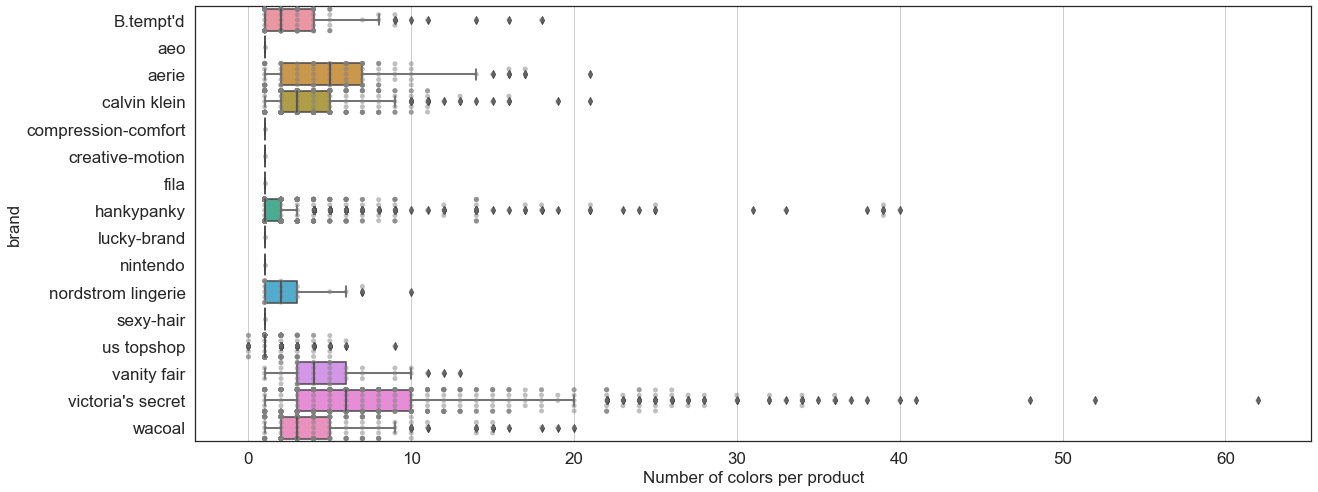

In [30]:
colors_df=pd.DataFrame()
for name, subset in df.groupby('brand_name'):
    colors= subset.groupby('product_name').color.nunique()
    colors_df= colors_df.append(pd.DataFrame({'color_num':colors, 'brand':name}))
    
f,axes= plt.subplots(1,1,figsize=(20,8))
ax=sns.boxplot(x='color_num', y='brand',data=colors_df, ax=axes, medianprops={'zorder':3})
ax=sns.swarmplot(x='color_num', y='brand', data=colors_df, color='grey', alpha=0.5)

ax.xaxis.grid(True)
ax.set_xlabel('Number of colors per product', fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=17)
plt.show()

In [31]:
colors_df.groupby('brand').color_num.agg(['median','mean','count']).sort_values('mean',ascending=False).transpose()

brand,victoria's secret,aerie,vanity fair,wacoal,calvin klein,B.tempt'd,nordstrom lingerie,hankypanky,us topshop,aeo,compression-comfort,creative-motion,fila,lucky-brand,nintendo,sexy-hair
median,6.000000,5.000000,4.000000,3.000000,3.000000,2.000000,2.000000,1.0000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,8.230894,5.533333,4.956522,4.181495,3.691441,3.236842,2.782609,2.5625,1.416949,1.0,1.0,1.0,1.0,1.0,1.0,1.0
count,615.000000,105.000000,46.000000,281.000000,444.000000,114.000000,23.000000,896.0000,295.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
display(colors_df[colors_df.color_num>=35].sort_values('color_num',ascending=False))

,color_num,brand
product_name,,
very sexy push-up bra,62,victoria's secret
victoria sport the player racerback sport bra by victoria sport,52,victoria's secret
body by victoria demi bra,48,victoria's secret
bombshell add-2-cups push-up bra,41,victoria's secret
rolled signature lace original rise thong,40,hankypanky
dream angels demi bra,40,victoria's secret
rolled signature lace low rise thong,39,hankypanky
signature lace low rise thong,39,hankypanky
signature lace original rise thong,39,hankypanky


#### info: in terms of average color of a product, victoria's secrect is the leader.

## What color dominates?

In [33]:
col_1st= df.groupby(['brand_name', 'color']).color.agg({'count_fir':'count'})
#### choose the column we want to agg first and we can do agg
#### using the dictionary format to assign the name of the statistic we agg.

df_count_first= col_1st.groupby(level=0).agg('idxmax')
#### idxmax returns the max value's idx; note that now the idx is in tuple!!!
#### 利用groupby(level=0)來處理有多重idx但只有一個column的資料
df_count_first = col_1st.loc[df_count_first.count_fir].reset_index()
#### use the tuple we get to slice the original count data

df_temp = df[-df.color.isin(df_count_first.color.unique())]
col_2nd= df_temp.groupby(['brand_name','color']).color.agg({'count_sec':'count'})
df_count_second= col_2nd.groupby(level=0).agg('idxmax')
df_count_second=col_2nd.loc[df_count_second.count_sec].reset_index()

df_4=df_count_first.merge(df_count_second, on='brand_name')
df_4.columns=['brand', '1st_color', 'count_1st_color','2nd_color', 'count_2nd_color' ]
for x in [df_count_first, df_count_second, df_temp, col_1st, col_2nd]:
    del x

In [34]:
df_4

,brand,1st_color,count_1st_color,2nd_color,count_2nd_color
0,B.tempt'd,Night,1609,Au Natural,549
1,aerie,True Black,4401,Navy,2184
2,calvin klein,Black,5407,Bare,2359
3,hankypanky,Black,6968,White,2471
4,nordstrom lingerie,Black,158,Beige Soft,130
5,us topshop,BLACK,448,MULTI,179
6,vanity fair,Star White,345,Midnight Black,289
7,victoria's secret,Black,17484,black,13134
8,wacoal,Black,6889,Naturally Nude,4034


## MRP - Maximum Retailer Price

In [35]:
def df_replace_all(text, dic,regex=False):
    for i,j in dic.items():
        text=text.str.replace(i,j, regex=regex)
    return text


df.mrp=df_replace_all(df['mrp'],{' USD':"", '$':"",' ':""})
##~~~~~~~停在如何把長度大於5的row找出來！

#find out mrp not in a numeric-like type 
idx=list()
for i in df.mrp:
    idx.append(len(i)>6)

display(df.mrp[idx])

#replace 
df.mrp=df_replace_all(df['mrp'], {'\t':"", '\n':"",'.*Now':"", '[0-9]{2}.[0-9]{2}–':""},regex=True)
#currency exchange
idx=df.mrp.str.contains('₡|Rp',regex=True)
###note: the ₡ and Rp represent for Costa Rican and Indonesian currencies, however these two currencies are very small.
### (1 usd = 580,22900 ₡ and 13,935 rp )
### Also, there are 6 products have this issue. Thus, I decide to drop these products.
df=df[-idx]

df.mrp=df.mrp.astype('float')

114       52.00–56.00                                                                                      
115       52.00–56.00                                                                                      
298       23.00–25.00                                                                                      
299       23.00–25.00                                                                                      
300       23.00–25.00                                                                                      
301       23.00–25.00                                                                                      
302       23.00–25.00                                                                                      
303       23.00–25.00                                                                                      
304       23.00–25.00                                                                                      
305       23.00–25.00       

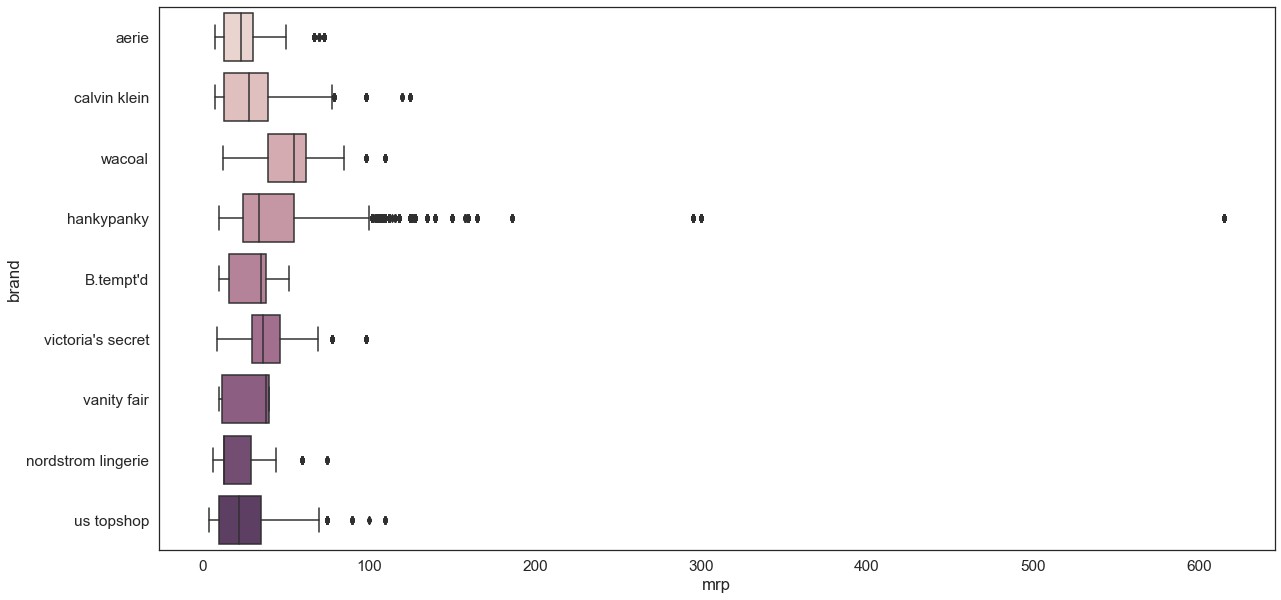

In [56]:
### drop brands with too few products
drop=['aeo','fila','fila', 'lucky-brand','creative-motion', 'sexy-hair', 'nintendo', 'compression-comfort',]

plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='mrp', y='brand_name', data=df[-df.brand_name.isin(drop)], palette=purple, order=StrMinStr(brands_name,drop))
ax.set_ylabel('brand', fontsize=17)
plt.show()
